# Propriétés d'une population fictive: analyse univariée quantitative de ages

Version du 7 mars 2024.

130 / 900 individus, cinq caractères: age, genre, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [4]:
### Lire le fichier et créer un objet DataFrame


# Alternative: 'data/observations_mod.csv'
path = 'data/observations_900.csv'

observations = pd.read_csv(path)
print(type(observations))
observations.set_index('id', inplace=True)
observations.head()

<class 'pandas.core.frame.DataFrame'>


,age,gender,revenu_mensuel,lecture_journal,parti
id,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste
2,31,H,4466,de temps en temps,gauche
3,79,F,5515,trois-quatre fois par semaine,populiste
4,26,H,1876,le week-end,écologiste
5,75,F,3296,trois-quatre fois par semaine,gauche


In [5]:
## Nombre de lignes et de colonnes du tableau
observations.shape

(900, 5)

In [6]:
### Nombre de lignes du tableau
# Noter qu'on crée une nouvelle variable avec un nom plus court
obs = observations
#obs = observations # 900
len(obs)

900

### Afficher et inspecter les données: âge

In [7]:
"""
* On crée une variable qui contient seulement la colonne 'âge'
c'est-à-dire une variable de type pandas.Series, la série de données 'âge'.
* Une pandas:Series est une liste indexée.
* NB: dans l'exemple l'index commence à 1 car issu des données originales importées, 
cf. ci-dessus. Normalement l'index commence à 0.
"""
age = obs['age']
type(age), age.head()

(pandas.core.series.Series,
 id
 1    87
 2    31
 3    79
 4    26
 5    75
 Name: age, dtype: int64)

In [8]:
### Noter la différence de type: DataFrame et Series
# Les méthodes sont parfois communes, parfois spécifiques
type(obs), type(age)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<Axes: xlabel='id'>

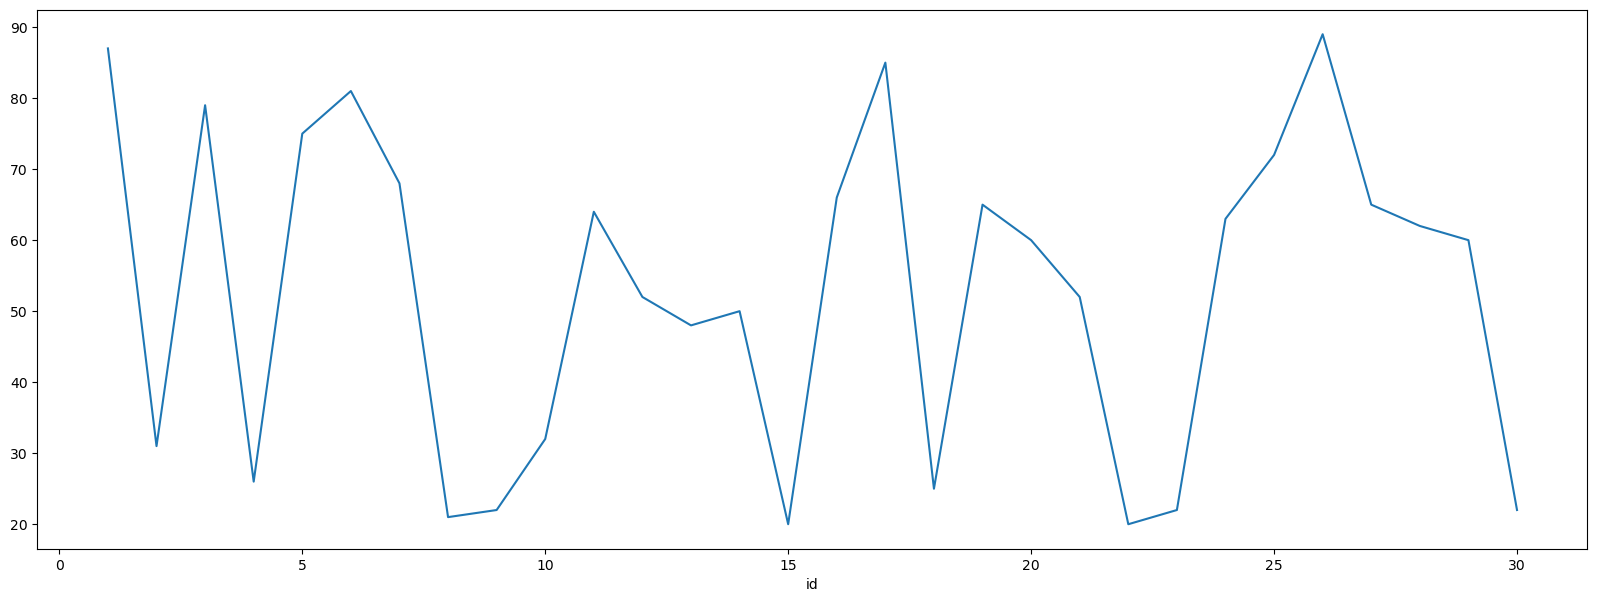

In [9]:
### Représentation des ages des premiers trente individus:
# Ce mode de représentation par défaut est à éviter (!!!) dans ce cas:
#  une ligne continue qui dessine des surfaces, illisibles et sans signification
age[:30].plot(figsize=(20,7))

<Axes: xlabel='id'>

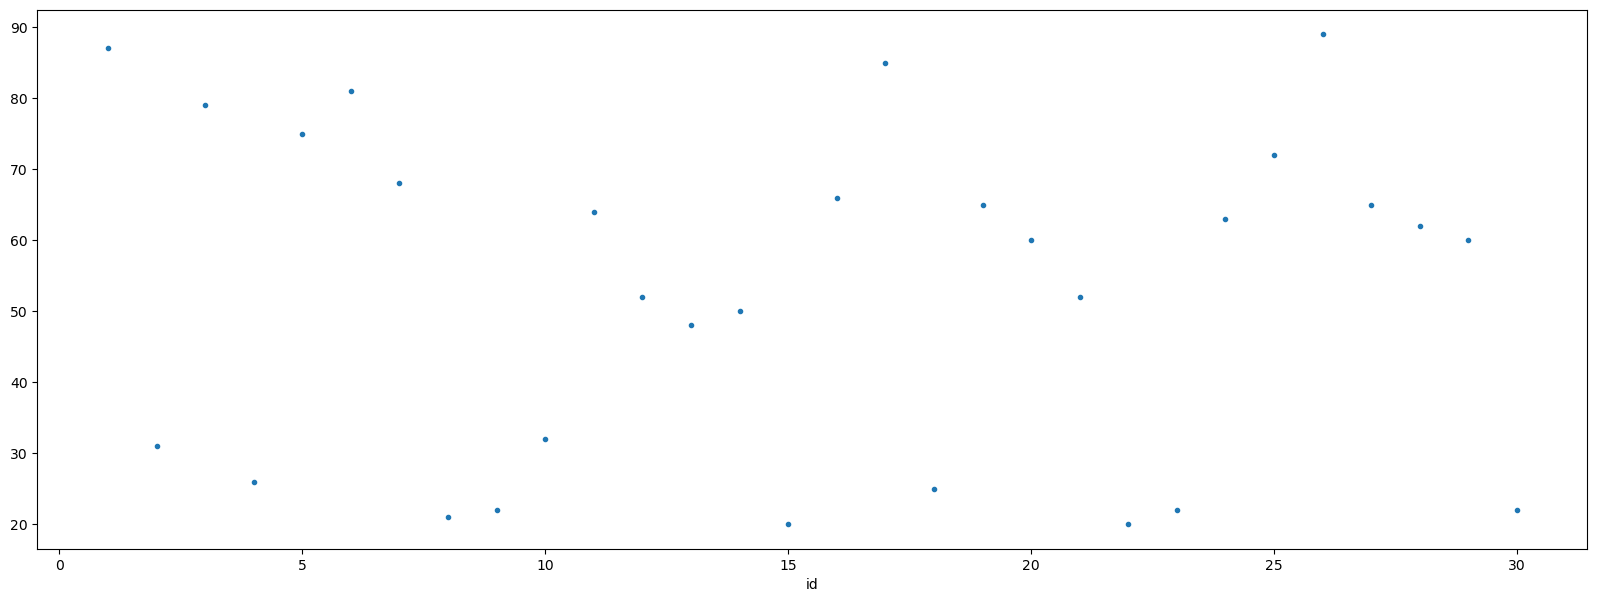

In [10]:
### Nuage de points: les individus en abscisses avec leur age en ordonnées.
#  type de représentation à éviter (!) dans ce cas
age[:30].plot(style='.',figsize=(20,7))

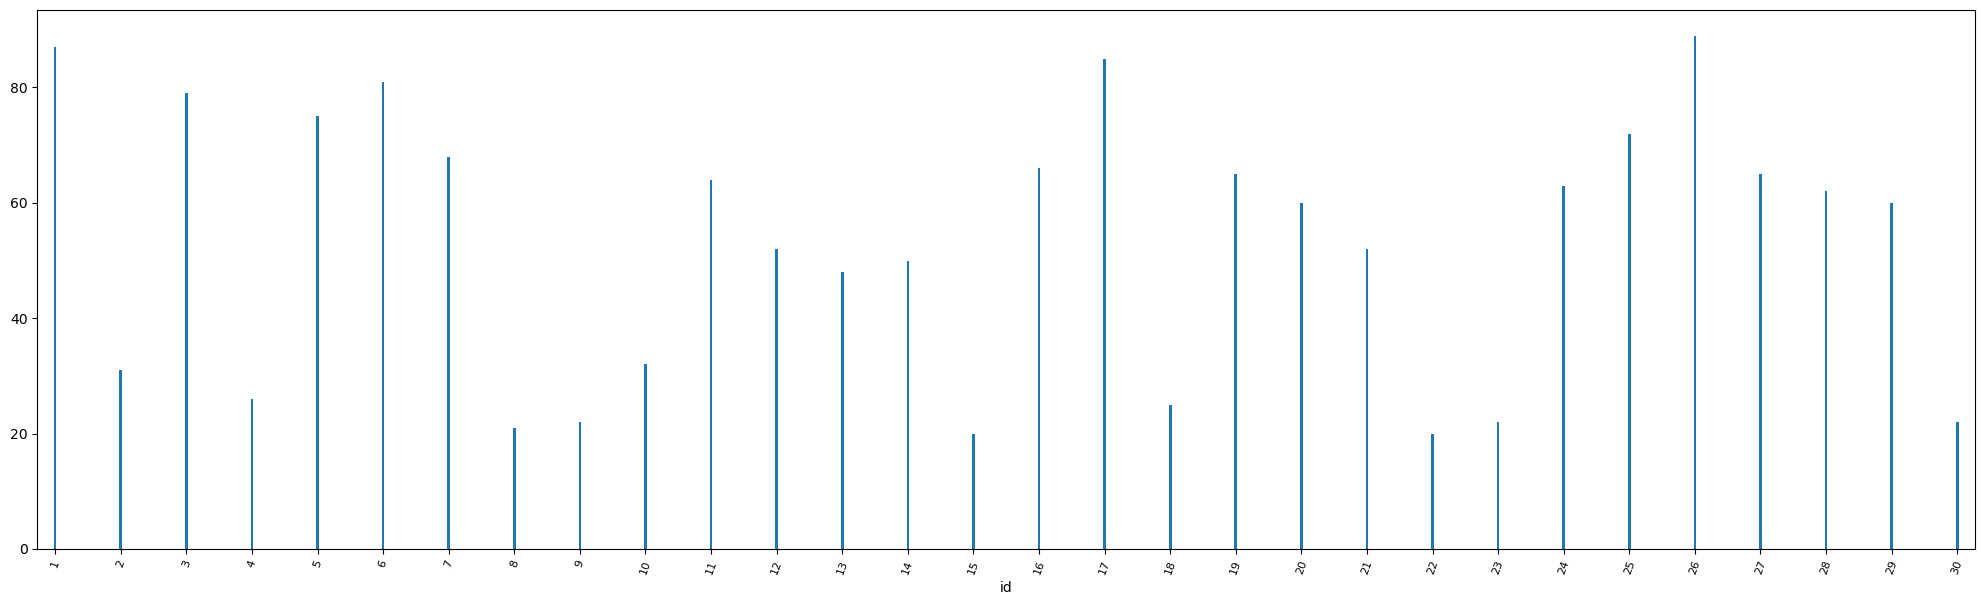

In [11]:
### Avec le diagramme à bâtons on a une 'image' plus parlante
# de l'age des individus mais illisible sans tri — il s'agira donc de trier
ax = age[:30].plot.bar(x='lab', y='val', rot=70, figsize=(25,7), width=0.04)
ax.tick_params(axis = 'x', labelsize = 8)

In [12]:
### Tri ascendant des valeurs
#  Pour le tri déscendant, 
#  mettre en argument de la fonction sort_values: ascending=False
s_age = age.sort_values() 
print('Min/max age:', s_age.min(), s_age.max())
s_age.head()

Min/max age: 18 90


id
325    18
447    18
805    18
898    18
735    18
Name: age, dtype: int64

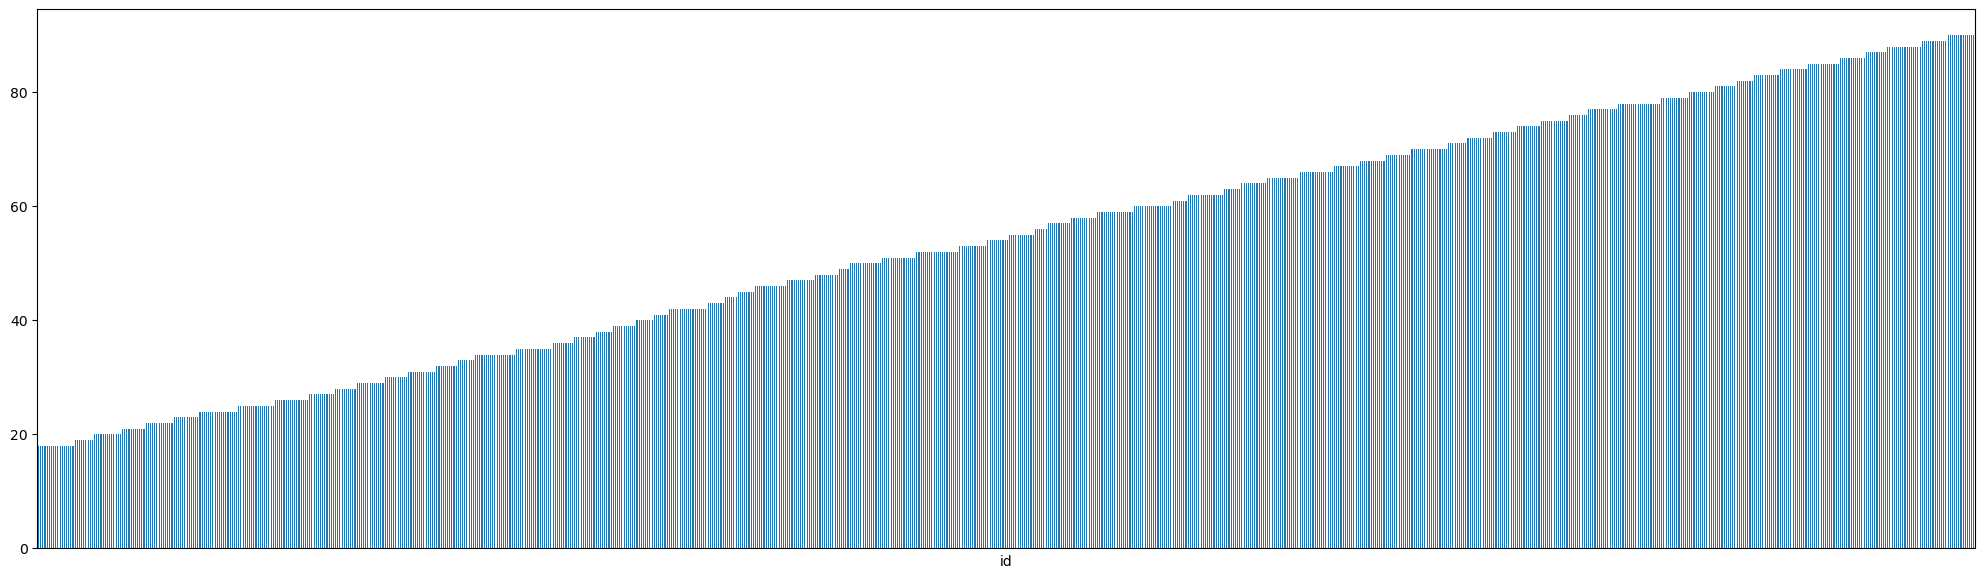

In [13]:
### Cette visualisation donne une impression de la croissance des âges
ax = s_age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
## Ticks effacés:
# https://dataplotplus.com/remove-xticks-from-a-plot-in-pandas-and-matplotlib/
ax.set_xticks([])
plt.show()

### Effectifs par valeur

Âge est traité comme variable quantitative discrète. C'est un cas limite car, étant donné la quantité de valeurs différentes, on pourrait aussi établir des classes et traiter l'âge comme variable quantitative continue.

À noter également que renseigner l'âge en années revient à créer des classes, les _années_ étant les _classes_ de valeurs, car l'âge peut aussi être mesurée en jours, ce qui est plus précis mais généralement moins significatif, du moins dans le cas présent.



In [14]:
### Regrouper par âge et compter les individus par valeur
# Distribution par valeur de l'age !
cs_age = s_age.groupby(s_age).count()
print(type(cs_age))
cs_age.head()

<class 'pandas.core.series.Series'>


age
18    17
19     9
20    13
21    11
22    13
Name: age, dtype: int64

In [15]:
### Transformer la serie en DataFrame
# noter que l'âge devient l'index du DataFrame
df_cs_age = pd.DataFrame(cs_age)
print(type(df_cs_age))
df_cs_age.columns = ['effectif']
df_cs_age.head()

<class 'pandas.core.frame.DataFrame'>


,effectif
age,
18,17
19,9
20,13
21,11
22,13


In [16]:
### Renommer la colonne
df_cs_age.columns=['effectif']
df_cs_age.head(), df_cs_age.index[:5]

(     effectif
 age          
 18         17
 19          9
 20         13
 21         11
 22         13,
 Int64Index([18, 19, 20, 21, 22], dtype='int64', name='age'))

In [17]:
### Ajouter les effectifs cumulés
# On ajoute à un cellule la valeur de la précédente
df_cs_age['effectif_cumule'] = df_cs_age['effectif'].cumsum()
df_cs_age.head()

,effectif,effectif_cumule
age,,
18,17,17
19,9,26
20,13,39
21,11,50
22,13,63


### Fréquence et fréquence cumulée

In [18]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_cs_age['frequence'] = (100 * df_cs_age['effectif'] \
                                   / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence
age,,,
18,17,17,1.89
19,9,26,1.00
20,13,39,1.44
21,11,50,1.22
22,13,63,1.44


In [19]:
### Ajouter la fréquence cumulée
df_cs_age['frequence_cumulee'] = (100 * df_cs_age['effectif_cumule'] \
                                / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
18,17,17,1.89,1.89
19,9,26,1.00,2.89
20,13,39,1.44,4.33
21,11,50,1.22,5.56
22,13,63,1.44,7.00


In [20]:
### Le centre de la population, partie inférieure
# on utilise la valeur '50' de la fréquence cumulée, milieu de la population
df_cs_age[df_cs_age['frequence_cumulee']<= 50].tail(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
51,16,408,1.78,45.33
52,20,428,2.22,47.56
53,13,441,1.44,49.00


In [21]:
### Le centre de la population, partie supérieure
# On verra plus bas la notion de médiane
df_cs_age[df_cs_age['frequence_cumulee']>= 50].head(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
54,10,451,1.11,50.11
55,12,463,1.33,51.44
56,6,469,0.67,52.11


### Représentations graphiques

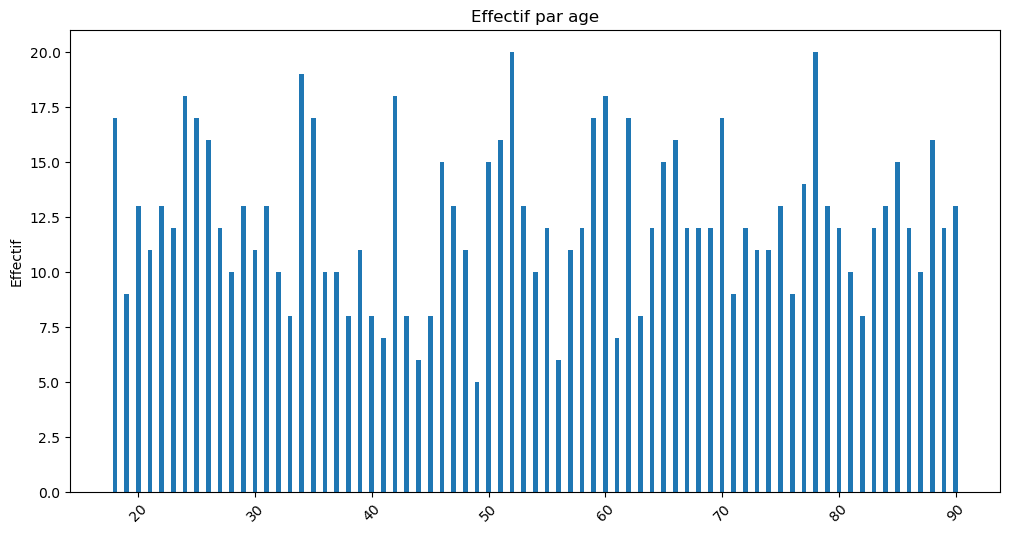

In [22]:
## Distribution des effectifs par age

objects = df_cs_age.index
eff = df_cs_age['effectif']

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par age')
plt.gcf().set_size_inches(12, 6)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [23]:
### Noter que dans le graphique précédent on présuppose que toutes les années sont 
# renseignées. Au cas contraire, il faudrait ajouter les années manquantes,
# afin de mettre en évidence les trous dans l'information

# nombre d'années attendues
print(90-18+1)
# nombre d'années renseignées
len(df_cs_age)

73


73

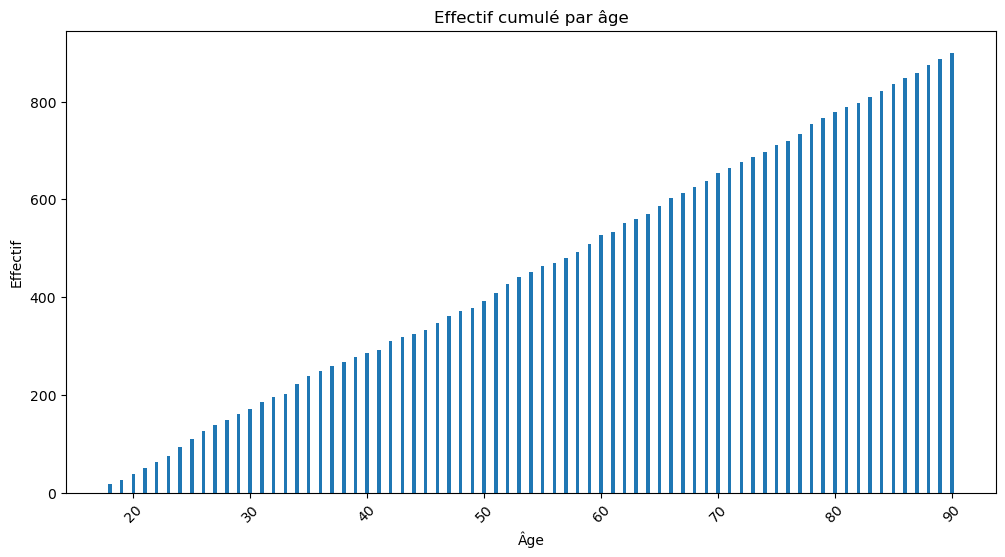

In [24]:
# Effectifs cumulés par âge

objects = df_cs_age.index
eff = df_cs_age['effectif_cumule']
#eff = df_cs_age['frequence_cumulee']



p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.xlabel('Âge')
plt.title('Effectif cumulé par âge')
plt.gcf().set_size_inches(12,6)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


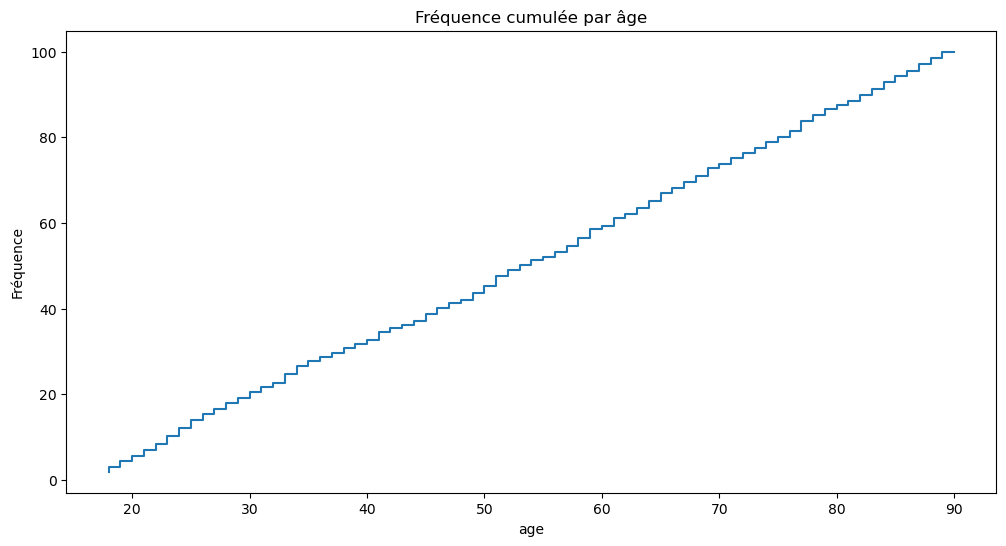

In [25]:
### Diagramme cumulatif : fréquences cumulées
#  On observe que la médiane est autour de 55 ans,
#  i.e. que la moitié de la population a moins de 55 ans, le reste plus
#  cf. la remarque ci-dessous relative à la fréquence cumulée 
#  et la cellule suivante
plt.ylabel('Fréquence')
plt.xlabel('Âge')
plt.title('Fréquence cumulée par âge')
df_cs_age['frequence_cumulee'].plot(figsize=(12,6), drawstyle='steps') #  style='o--',
plt.draw()

In [26]:
### Le centre de la population, partie supérieure
df_cs_age[df_cs_age['frequence_cumulee']>= 50].head(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
54,10,451,1.11,50.11
55,12,463,1.33,51.44
56,6,469,0.67,52.11


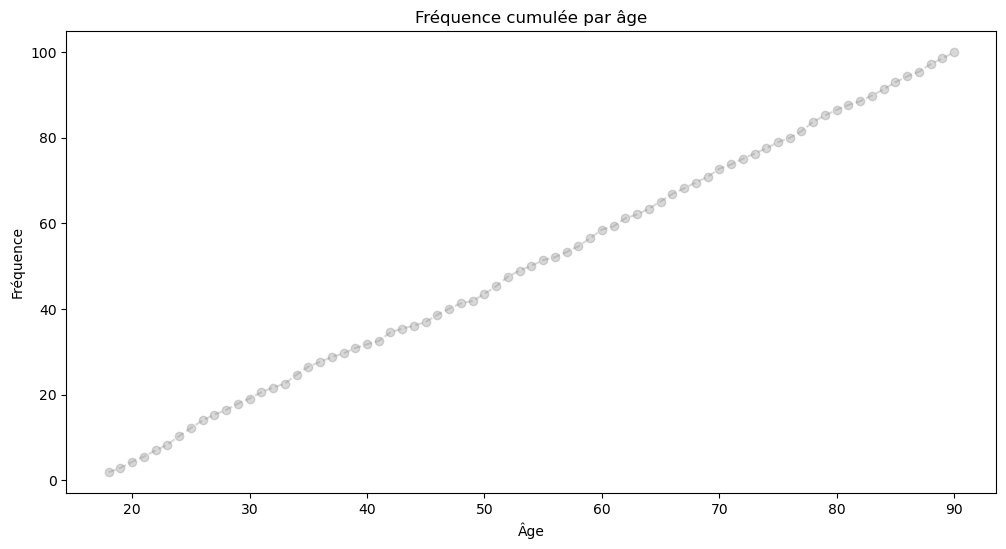

In [27]:
### Deux représentations graphiques différentes pour la même croissance.
# noter qu'à identité de données l'impression visuelle est légèrement différente,
# on voit mieux les moments de croissance plus ou moins forte
# Documentation
#   https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py
x = df_cs_age.index
y = df_cs_age['frequence_cumulee']
fig = plt.figure(figsize=[12,6])
plt.ylabel('Fréquence')
plt.xlabel('Âge')
plt.title('Fréquence cumulée par âge')
### Commenter l'une des deux lignes suivantes pour voire la différence
#plt.step(x, y, label='pre (default)')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)
plt.show()

In [28]:
### Préparer un liste de valeurs pour filtrer
list(range(30, 40))

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [29]:
### Filtrer en fonction d'âges différents, filtre sur l'index
# noter les différences accroissements (fréquences)
df_cs_age[df_cs_age.index.isin(list(range(30, 40)))]

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
30,11,172,1.22,19.11
31,13,185,1.44,20.56
32,10,195,1.11,21.67
33,8,203,0.89,22.56
34,19,222,2.11,24.67
35,17,239,1.89,26.56
36,10,249,1.11,27.67
37,10,259,1.11,28.78
38,8,267,0.89,29.67


In [30]:
### calculer la différence avec l'accroissement précédent
df_cs_age[df_cs_age.index.isin(list(range(30, 40)))]['effectif'].diff().apply(lambda x : int(x) if not(np.isnan(x)) else x)

age
30     NaN
31     2.0
32    -3.0
33    -2.0
34    11.0
35    -2.0
36    -7.0
37     0.0
38    -2.0
39     3.0
Name: effectif, dtype: float64

## Paramètres de centralité et de dispersion

In [31]:
### Cette méthode d'une série fournit les caractéristiques
#  de tendance centrale et de dispersion
# À avoir toujours sous la main pour les variables quantitatives 
age.describe()

count    900.000000
mean      54.055556
std       21.382611
min       18.000000
25%       35.000000
50%       54.000000
75%       72.000000
max       90.000000
Name: age, dtype: float64

In [32]:
### A robust estimate of variability is the median absolute deviation from the median or MAD
# Bruce Peter C. et al., Practical statistics for data scientists, Sebastopol, Calif., 2020, p. 16.

# https://www.statsmodels.org/stable/rlm.html#module-statsmodels.robust
from statsmodels.robust.scale import mad

## La médiane des différences entre chaque valeur et la médiane
mad(age)

28.169442151606436

In [33]:
### La valeur la plus fréquente
print(age.mode()[0])
### Quel effectif a-t-elle ?
len(age[age == 52])

52


20

In [34]:
min(age), max(age)

(18, 90)

<Axes: >

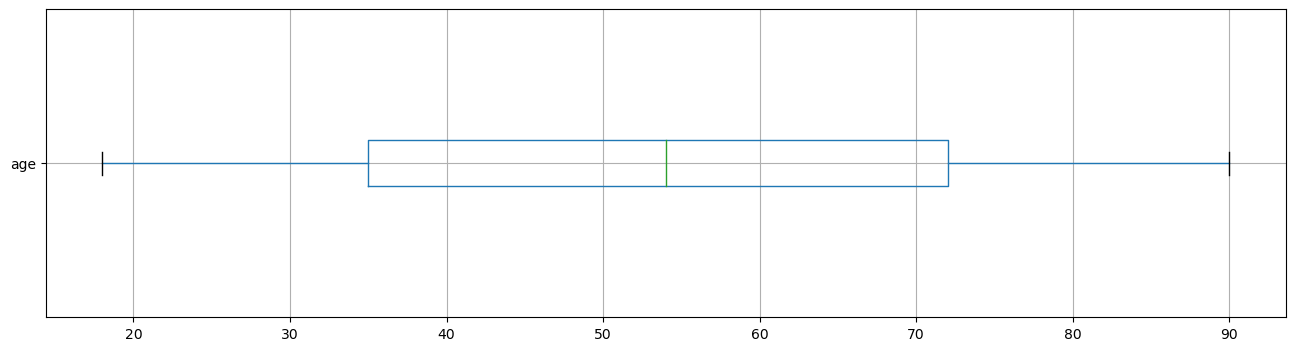

In [35]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
# La moitié de la population se situe entre 31 et 68 ans
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

In [36]:
### Calcul des valeurs extrêmes
# NB Il n'y en a parmi les valeurs de cette variable 
q1 = age.quantile(q=0.25); print(f'Première quartile: {q1}')
q2 = age.quantile(q=0.5); print(f'Médiane: {q2}')
q3 = age.quantile(q=0.75); print(f'Troisième quartile: {q3}')
print('-----')
distance_inter_quantile = q3-q1
print(f'Ecart interquartile = {distance_inter_quantile};  Multiplié par 1.5 = {distance_inter_quantile*1.5}')
print('Valeurs extrèmes:')
extr_inf = q1 - distance_inter_quantile * 1.5; print(f'Limite inférieure = {extr_inf}, valeur minimale réelle: {min(age)}')
extr_sup = q3 + distance_inter_quantile * 1.5; print(f'Limite supérieure = {extr_sup}, valeur maximale réelle: {max(age)}')

Première quartile: 35.0
Médiane: 54.0
Troisième quartile: 72.0
-----
Ecart interquartile = 37.0;  Multiplié par 1.5 = 55.5
Valeurs extrèmes:
Limite inférieure = -20.5, valeur minimale réelle: 18
Limite supérieure = 127.5, valeur maximale réelle: 90


### Histogramme

Observer les différents découpages des âges (générations) qui suivent et des effectifs respectifs:

lequel est le plus pertinent scientifiquement ?


In [37]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
c_obs = obs.copy(deep=True)

In [38]:
c_obs.head()

,age,gender,revenu_mensuel,lecture_journal,parti
id,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste
2,31,H,4466,de temps en temps,gauche
3,79,F,5515,trois-quatre fois par semaine,populiste
4,26,H,1876,le week-end,écologiste
5,75,F,3296,trois-quatre fois par semaine,gauche


#### Codage de domaine

In [39]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec des classes significatives au point de vue de du domaine étudié,
# modifiables en fonction de la problématique 
# Par exemple: en formation, jeunes travailleurs, travailleurs expérimentés, travailleurs seniors, préretraite, retraités
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs['generation_heur'] = pd.cut(c_obs['age'], generations, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
c_obs['generation_heur'] = c_obs['generation_heur'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur
id,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90
2,31,H,4466,de temps en temps,gauche,26-35
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90


### Classes d'amplitude identique

In [40]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec une amplitude identique des classes:
# on fixe le nombre de classes et le logiciel créé cinq classes d'égale amplitude (sur les valeurs),
# ce qui dans l'exemple donne approximativement 13 ou 14 ans d'amplitude 
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_cut'] = pd.cut(c_obs['age'], 6, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_cut'] = c_obs['generation_cut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut
id,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,78-90
2,31,H,4466,de temps en temps,gauche,26-35,30-42
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,78-90


### Classes d'effectifs identiques

In [41]:
### Ajouter une colonne avec codage des années de naissance 
# en relation de classes avec effectifs identiques ou proches
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_qcut'] = pd.qcut(c_obs['age'], 6)  
 
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_qcut'] = c_obs['generation_qcut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)))

# Inspection
c_obs.head(10)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut
id,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,78-90,78-90
2,31,H,4466,de temps en temps,gauche,26-35,30-42,29-42
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,78-90,78-90
4,26,H,1876,le week-end,écologiste,26-35,18-30,17-29
5,75,F,3296,trois-quatre fois par semaine,gauche,66-90,66-78,66-78
6,81,H,3017,trois-quatre fois par semaine,droite,66-90,78-90,78-90
7,68,F,7569,tous les jours,gauche,66-90,66-78,66-78
8,21,H,3338,très rarement,gauche,18-25,18-30,17-29
9,22,F,2370,tous les jours,écologiste,18-25,18-30,17-29


### Amplitudes et effectifs

In [42]:
### Lister les categories, catégories heuristiques
c = c_obs['generation_heur'].unique(); print(c)
list(c.categories)

['66-90', '26-35', '18-25', '56-65', '46-55', '36-45']
Categories (6, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65' < '66-90']


['18-25', '26-35', '36-45', '46-55', '56-65', '66-90']

In [43]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Pertinent en fonction de critères de domaine liés à l'âge
gb_generation_heur = pd.DataFrame(c_obs.groupby('generation_heur').size())
gb_generation_heur.columns = ['effectif']
gb_generation_heur

,effectif
generation_heur,
18-25,110
26-35,129
36-45,94
46-55,130
56-65,123
66-90,314


In [44]:
### Lister les categories, amplitudes égales
c = c_obs['generation_cut'].unique(); print(c)
list(c.categories)

['78-90', '30-42', '18-30', '66-78', '54-66', '42-54']
Categories (6, object): ['18-30' < '30-42' < '42-54' < '54-66' < '66-78' < '78-90']


['18-30', '30-42', '42-54', '54-66', '66-78', '78-90']

In [45]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Amplitude égale mais effectifs différents: le moins significatif scientifiquement?
gb_generation_cut = pd.DataFrame(c_obs.groupby('generation_cut').size())
gb_generation_cut.columns = ['effectif']
gb_generation_cut

,effectif
generation_cut,
18-30,161
30-42,132
42-54,148
54-66,145
66-78,148
78-90,166


In [46]:
### Lister les categories, effectifs égaux dans chaque classe
c = c_obs['generation_qcut'].unique(); print(c)
list(c.categories)

['78-90', '29-42', '17-29', '66-78', '54-66', '42-54']
Categories (6, object): ['17-29' < '29-42' < '42-54' < '54-66' < '66-78' < '78-90']


['17-29', '29-42', '42-54', '54-66', '66-78', '78-90']

In [47]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Les effectifs sont presque identiques, l'amplitude des classes en découle
gb_generation_qcut = pd.DataFrame(c_obs.groupby('generation_qcut').size())
gb_generation_qcut.columns = ['effectif']
gb_generation_qcut

,effectif
generation_qcut,
17-29,161
29-42,150
42-54,140
54-66,151
66-78,152
78-90,146


## Représentation graphique: Diagramme à barres

Comparer les différents cas de figure, en utilisant alternativement l'un ou l'autre scénario de classement

Noter qu'un diagramme a barre, qui représente pas les densités mais les effectifs, n'est pas, en principe, un histogramme

In [48]:
objects_h = [l for l in gb_generation_heur.index]
eff_h = [l for l in gb_generation_heur['effectif']]
nom_h = 'heur'

In [49]:
objects_c = [l for l in gb_generation_cut.index]
eff_c = [l for l in gb_generation_cut['effectif']]
nom_c ='cut'

In [50]:
objects_q = [l for l in gb_generation_qcut.index]
eff_q = [l for l in gb_generation_qcut['effectif']]
nom_q = 'qcut'

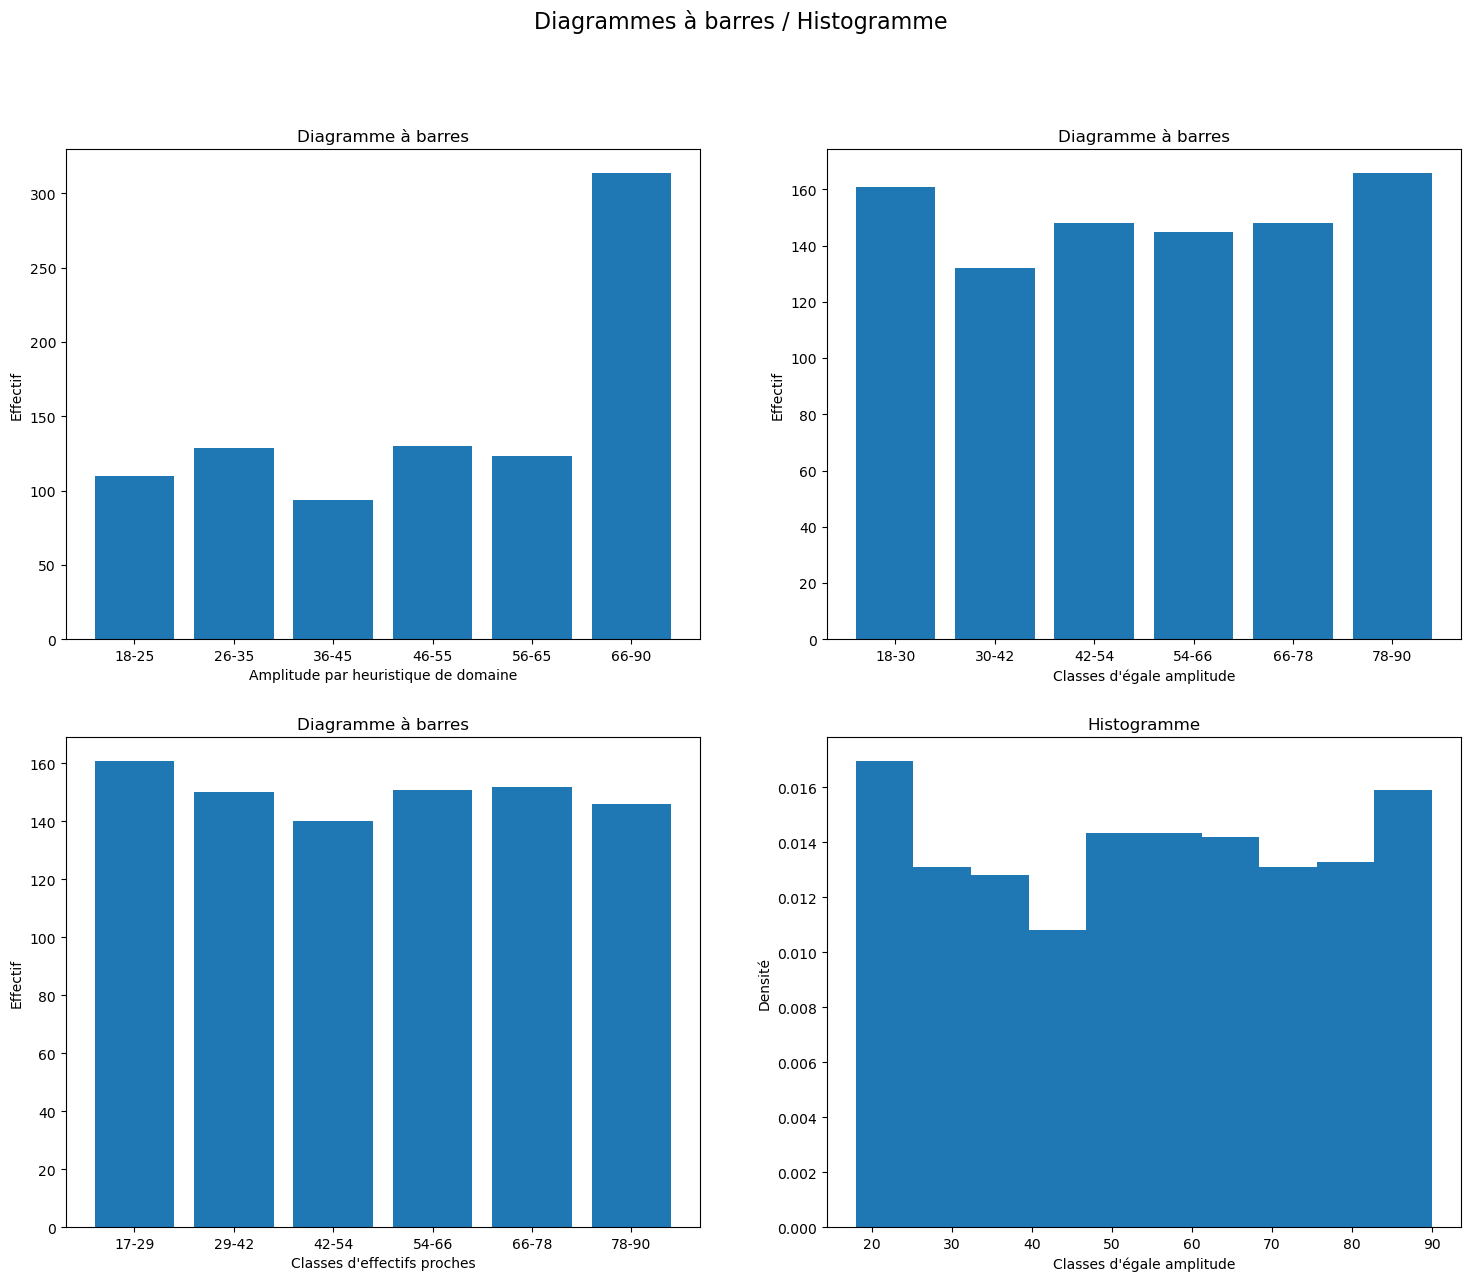

In [51]:
### Diagrammes à barres: ce ne sont pas à strictement parler des histogrammes
# Attention aux différentes étendues des âges, les densités des tranches sont différentes

### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# tandis que l'aire des barres représente la fréquence:
# la somme de toutes les aires de l'histogramme, donc de toutes les fréquences est égale à 1.


### https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html

fig,([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(18,14))

ax1.bar(objects_h, eff_h)
ax1.set_title('Diagramme à barres')
ax1.set_xlabel('Amplitude par heuristique de domaine')
ax1.set_ylabel('Effectif')

ax2.bar(objects_c, eff_c)
ax2.set_title('Diagramme à barres')
ax2.set_xlabel("Classes d'égale amplitude")
ax2.set_ylabel('Effectif')

ax3.bar(objects_q, eff_q)
ax3.set_title('Diagramme à barres')
ax3.set_xlabel("Classes d'effectifs proches")
ax3.set_ylabel('Effectif')

ax4.hist(c_obs['age'], density=True)
ax4.set_title('Histogramme')
ax4.set_xlabel("Classes d'égale amplitude")
ax4.set_ylabel('Densité')



fig.suptitle('Diagrammes à barres / Histogramme', fontsize=16)


plt.show()


# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg

#plt.xticks(rotation=45)
plt.show()


## Histogramme

In [52]:
# Créer dix classes d'égale amplitude
c_obs['generation_cut_10'] = pd.cut(c_obs['age'], 10, right=False)
c_obs['generation_cut_10'] = c_obs['generation_cut_10'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)))
gb_generation_cut_10 = pd.DataFrame(c_obs.groupby('generation_cut_10').size())
gb_generation_cut_10.columns = ['effectif']
gb_generation_cut_10

,effectif
generation_cut_10,
18-25,110
25-32,85
32-39,83
39-46,70
46-54,93
54-61,93
61-68,92
68-75,85
75-82,86


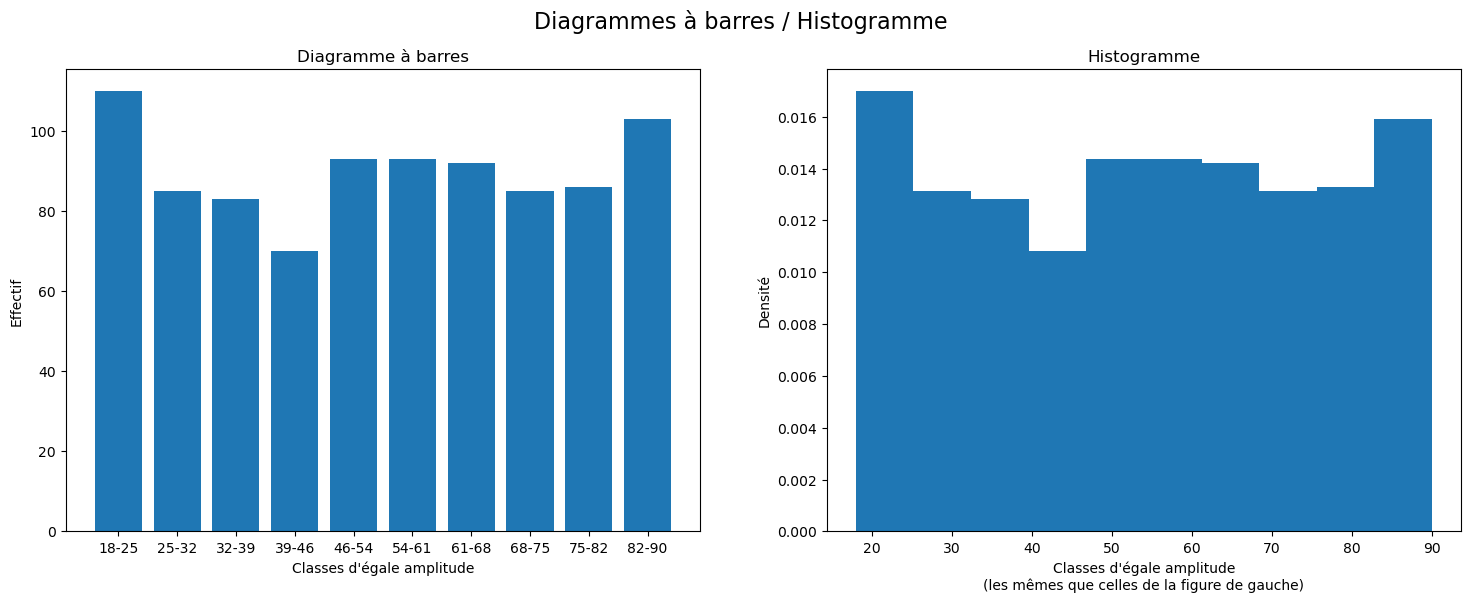

In [53]:
### À gauche diagramme à barre: ce n'est pas un vrai histogramme
# La hauteur des barres, en ordonnées, représente l'effectif.

### À droite: représentation automatique
# Dix classes de la même amplitude en abscisses, effectifs (!) en ordonnées
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html


### https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

ax1.set_title('Diagramme à barres')
ax1.bar(gb_generation_cut_10.index, gb_generation_cut_10.effectif)
ax1.set_xlabel("Classes d'égale amplitude")
ax1.set_ylabel('Effectif')

## Noter que si on met density à 'False' sortent les effectifs
# ax2.hist(c_obs['age'], density=False)
ax2.hist(c_obs['age'], density=True)
ax2.set_title('Histogramme')
ax2.set_xlabel("Classes d'égale amplitude\n(les mêmes que celles de la figure de gauche)")
ax2.set_ylabel('Densité')



fig.suptitle('Diagrammes à barres / Histogramme', fontsize=16)


plt.show()


# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg

#plt.xticks(rotation=45)
plt.show()


### Histogrammes des découpages par générations et répartition d'égale amplitude

In [54]:
gb_generation_heur = gb_generation_heur.reset_index()
gb_generation_heur.columns=['generation', 'effectif']
gb_generation_heur

,generation,effectif
0,18-25,110
1,26-35,129
2,36-45,94
3,46-55,130
4,56-65,123
5,66-90,314


In [55]:
### L'histogramme est basé sur la densité de différentes tranches
#  Cette fonction calcule la densité des tranches
def calculer_densite(ligne):
    i = ligne['generation'].split('-')
    # print(i)
    ampl = int(i[1])-int(i[0])
    # print(ampl)
    d = round(ligne['frequence']/ampl,4)
    return(d)

In [56]:
### Séparer et préparer les différentes valeurs
def preparer_valeurs(df):
    df['frequence'] = (df['effectif']/df['effectif'].sum()).round(4)
    df['densité'] = df.apply(calculer_densite, axis=1)
    df['start'] = df.apply(lambda x : int(x['generation'].split('-')[0]), axis=1)
    df['width'] = df.apply(lambda x : int(x['generation'].split('-')[1])-int(x['generation'].split('-')[0]), axis=1)
    return df

In [57]:
ndf_h = preparer_valeurs(gb_generation_heur)
ndf_h

,generation,effectif,frequence,densité,start,width
0,18-25,110,0.1222,0.0175,18,7
1,26-35,129,0.1433,0.0159,26,9
2,36-45,94,0.1044,0.0116,36,9
3,46-55,130,0.1444,0.0160,46,9
4,56-65,123,0.1367,0.0152,56,9
5,66-90,314,0.3489,0.0145,66,24


In [58]:
gb_generation_cut = gb_generation_cut.reset_index()
gb_generation_cut.columns=['generation', 'effectif']
gb_generation_cut

,generation,effectif
0,18-30,161
1,30-42,132
2,42-54,148
3,54-66,145
4,66-78,148
5,78-90,166


In [59]:
ndf_c = preparer_valeurs(gb_generation_cut)
ndf_c

,generation,effectif,frequence,densité,start,width
0,18-30,161,0.1789,0.0149,18,12
1,30-42,132,0.1467,0.0122,30,12
2,42-54,148,0.1644,0.0137,42,12
3,54-66,145,0.1611,0.0134,54,12
4,66-78,148,0.1644,0.0137,66,12
5,78-90,166,0.1844,0.0154,78,12


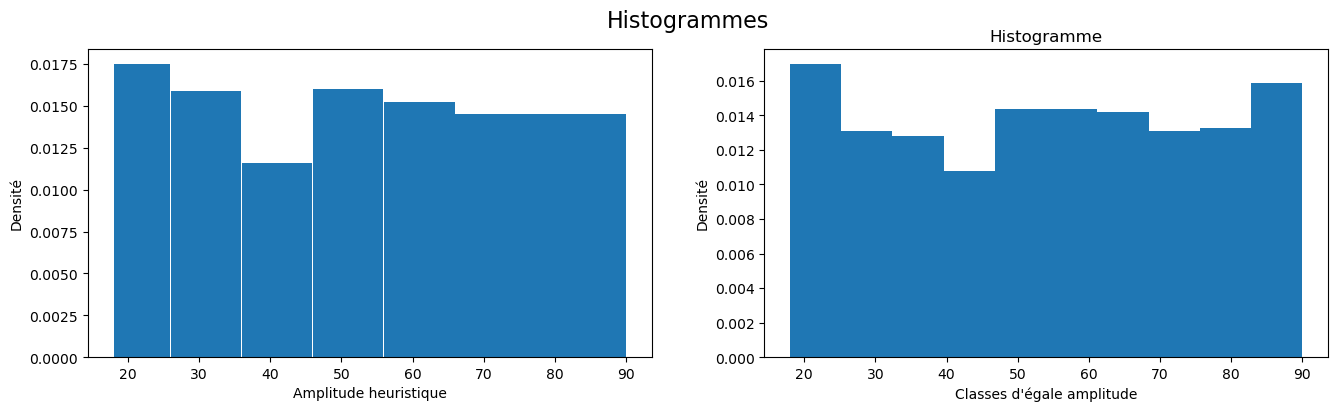

In [60]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire: à effectif égale aire égale


### https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html

fig,(ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

tkx_1 = [l for l in ndf_h['start']]
eff_1 = [l for l in ndf_h['densité']]
width_1 = [l+0.9 if l < 10 else l for l in ndf_h['width']]


tkx_2 = [l for l in ndf_c['start']]
eff_2 = [l for l in ndf_c['densité']]
width_2 = [l+0.8 if l < 10 else l for l in ndf_c['width']]

ax1.bar(tkx_1, eff_1, width=width_1, align="edge")
ax1.set_xlabel('Amplitude heuristique')
ax1.set_ylabel('Densité')

ax2.hist(c_obs['age'], density=True)
ax2.set_title('Histogramme')
ax2.set_xlabel("Classes d'égale amplitude")
ax2.set_ylabel('Densité')

fig.suptitle('Histogrammes', fontsize=16)


plt.show()

Text(0.5, 0.98, 'Violin plot / Histogramme')

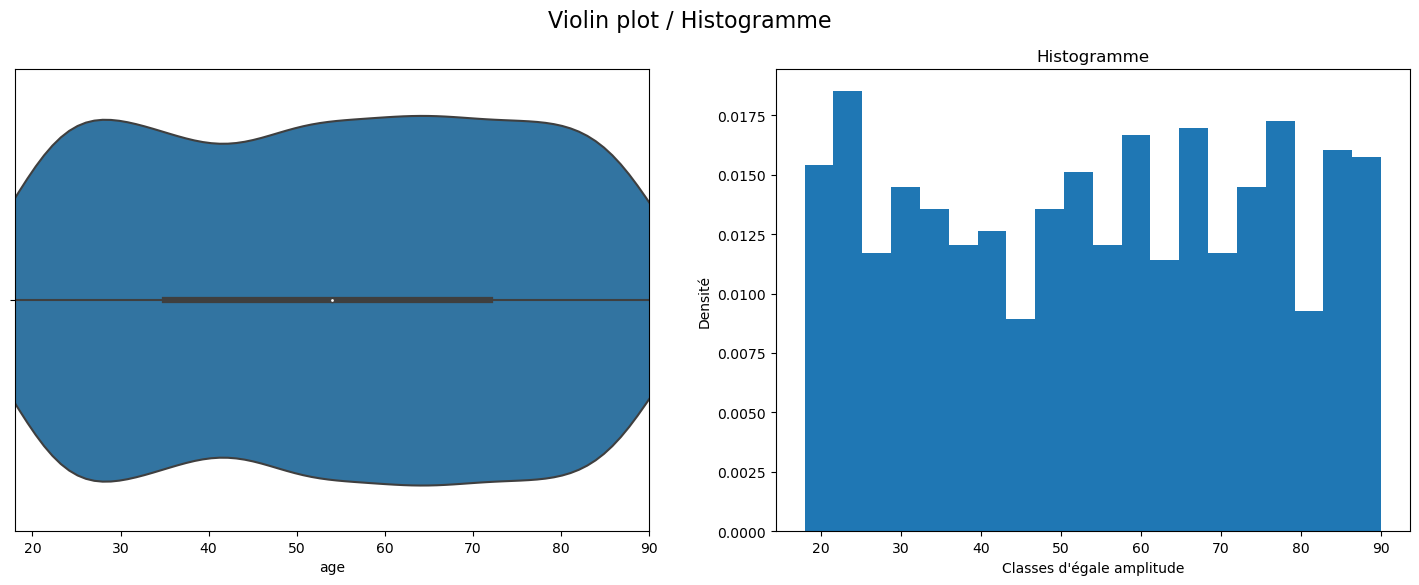

In [63]:
### Histogramme vs Violinplot

### https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

d = c_obs["age"]

# https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.violinplot(x = d, ax = ax1)

### Noter que au delà des limites les valeurs sont coupées car postulées
ax1.set_xlim(left=min(d), right=max(d))

## Noter que si on met density à 'False' sortent les effectifs
# ax2.hist(c_obs['age'], density=False)
ax2.hist(c_obs['age'], bins=20, density=True)
ax2.set_title('Histogramme')
ax2.set_xlabel("Classes d'égale amplitude")
ax2.set_ylabel('Densité')



fig.suptitle('Violin plot / Histogramme', fontsize=16)







## Pyramide des ages

In [64]:
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut,generation_cut_10
id,,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,78-90,78-90,82-90
2,31,H,4466,de temps en temps,gauche,26-35,30-42,29-42,25-32
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,78-90,78-90,75-82


In [65]:
### Ajouter une colonne avec codage des années de naissance par lustres (périodes de 5 ans)
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

lustres = list(range(18, 97, 5))
c_obs['lustres'] = pd.cut(c_obs['age'], lustres, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
c_obs['lustres'] = c_obs['lustres'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut,generation_cut_10,lustres
id,,,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,78-90,78-90,82-90,83-87
2,31,H,4466,de temps en temps,gauche,26-35,30-42,29-42,25-32,28-32
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,78-90,78-90,75-82,78-82


In [66]:
gb_gen_lustre= c_obs[['gender', 'lustres']].groupby(by=['gender', 'lustres']).size()

In [67]:
gb_gen_lustre=gb_gen_lustre.reset_index()
gb_gen_lustre.columns=['gender','lustre', 'effectif']
gb_gen_lustre.head()

,gender,lustre,effectif
0,F,18-22,39
1,F,23-27,43
2,F,28-32,34
3,F,33-37,33
4,F,38-42,25


In [68]:
print(list(gb_gen_lustre.lustre))
gb_gen_lustre[gb_gen_lustre.lustre == '33-37']

['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68-72', '73-77', '78-82', '83-87', '88-92', '18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68-72', '73-77', '78-82', '83-87', '88-92']


,gender,lustre,effectif
3,F,33-37,33
18,H,33-37,31


In [69]:
df_lu_f = pd.DataFrame(gb_gen_lustre[['lustre', 'effectif']][gb_gen_lustre['gender'] == 'F'])
df_lu_f.columns=['lustre', 'femmes']
df_lu_f.head()

,lustre,femmes
0,18-22,39
1,23-27,43
2,28-32,34
3,33-37,33
4,38-42,25


In [70]:
df_lu_h = pd.DataFrame(gb_gen_lustre[['lustre', 'effectif']][gb_gen_lustre['gender'] == 'H'])
df_lu_h.columns=['lustre', 'hommes']
df_lu_h.head()

,lustre,hommes
15,18-22,24
16,23-27,32
17,28-32,23
18,33-37,31
19,38-42,27


In [71]:
df_gen_lustre = pd.merge(df_lu_f, df_lu_h, how='inner', on='lustre')
df_gen_lustre.head()

,lustre,femmes,hommes
0,18-22,39,24
1,23-27,43,32
2,28-32,34,23
3,33-37,33,31
4,38-42,25,27


In [72]:
df_gen_lustre['hommes'] = df_gen_lustre['hommes'].apply(lambda x : x*-1)
df_gen_lustre.head()

,lustre,femmes,hommes
0,18-22,39,-24
1,23-27,43,-32
2,28-32,34,-23
3,33-37,33,-31
4,38-42,25,-27


In [73]:
lrev = copy.deepcopy(list(df_gen_lustre['lustre']))
lrev.reverse()
print(lrev)

['88-92', '83-87', '78-82', '73-77', '68-72', '63-67', '58-62', '53-57', '48-52', '43-47', '38-42', '33-37', '28-32', '23-27', '18-22']


[]

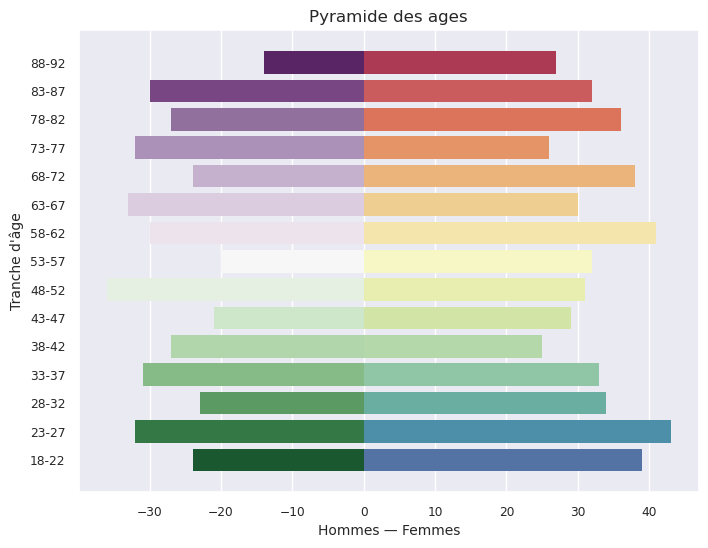

In [74]:

# https://towardsdatascience.com/different-bar-charts-in-python-6d984b9c6b17

# Prepare Data
plt.rcParams["figure.figsize"] = (8,6)
sns.set(font_scale=0.8)
#Class
AgeClass = lrev
#Chart
bar_plot = sns.barplot(x='femmes', y='lustre', data=df_gen_lustre, order=AgeClass, lw=0, palette="Spectral")
bar_plot = sns.barplot(x='hommes', y='lustre', data=df_gen_lustre, order=AgeClass, lw=0, palette="PRGn")
plt.title("Pyramide des ages", fontsize=12)
plt.xlabel("Hommes — Femmes", fontsize=10)
plt.ylabel("Tranche d'âge", fontsize=10)
plt.savefig('graphics/pyramid_genre_age.jpg', pad_inches=1)
plt.plot()

(18.0, 90.0)

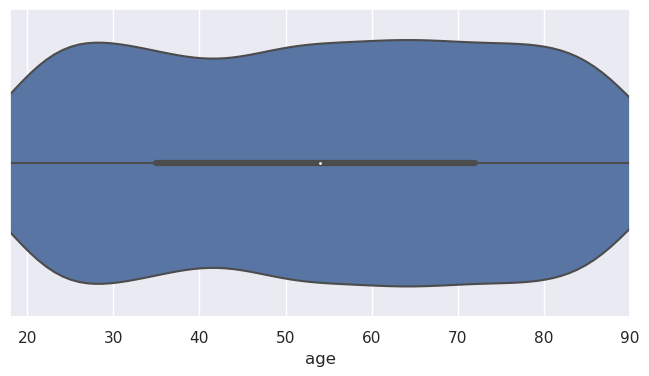

In [75]:
### Violinplot : on retrouve la même distribution, mais dans la pyramide la siluette
# est verticale, dans le violin plot horizontale, avec indication de la médiane 
# et des quartiles

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(8,4)})


a = obs["age"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont coupées car postulées
ax.set_xlim(left=min(a), right=max(a))



## Distribution de probabilité normale et standardisée

* [Loi normale](https://fr.wikipedia.org/wiki/Loi_normale) (Wikpedia)
* Ci-dessous, représentation utilisant les librairies Numpy (pour produire les données) et Seaborn (pour les représenter)

### QQ Plots
"Q-Q plots are a handy tool for visually inspecting how well your data matches a known probability distribution (prob dsn). If the match is good, the data should line up more or less diagonally in the Q-Q plot. A common usage is to verify normality, i.e. how well the data matches a Normal or Gaussian dsn."
https://www.r-bloggers.com/2011/08/q-q-plots-for-multi-modal-performance-data/

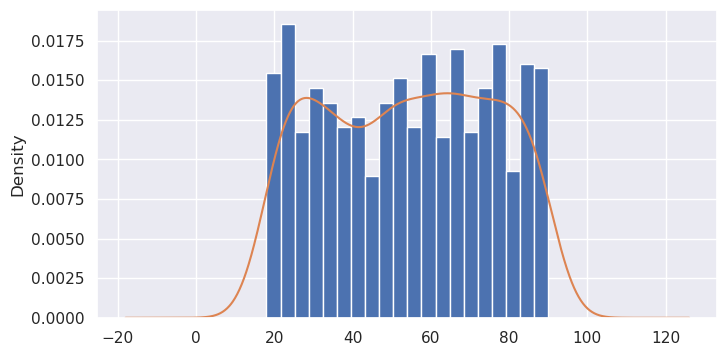

In [76]:
### Représentation automatique
# Densité !
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html
# https://stackoverflow.com/questions/25577317/pandas-histogram-in-python-possible-to-make-probability-density-instead-of-coun

c_obs['age'].plot(kind='hist', density=True, bins=20)
c_obs['age'].plot.kde()
plt.show()

In [77]:
## Ajout d'une colonne avec distribution normalisée
age = c_obs['age']

m = age.mean()
std = age.std()
print(m, std, '\n')
c_obs['age_norm'] = c_obs['age'].apply(lambda x : (x-m)/std )
c_obs.head(2)

54.05555555555556 21.382610750709937 



,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut,generation_cut_10,lustres,age_norm
id,,,,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,78-90,78-90,82-90,83-87,1.540712
2,31,H,4466,de temps en temps,gauche,26-35,30-42,29-42,25-32,28-32,-1.078239


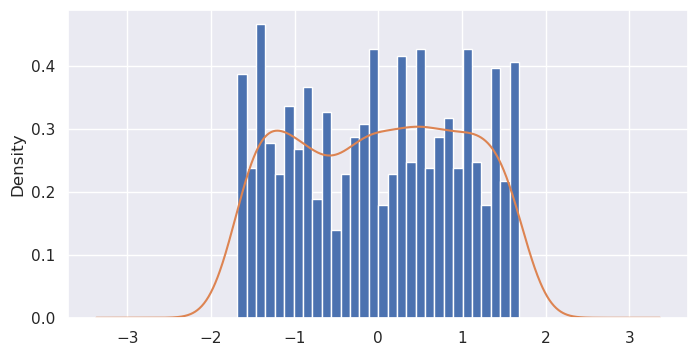

In [78]:
c_obs['age_norm'].plot(kind='hist', density=True, bins=30)
c_obs['age_norm'].plot.kde()
plt.show()

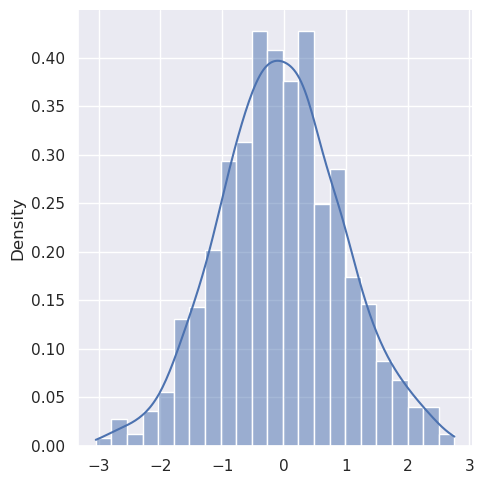

In [79]:
### Probabilité totale = aire sous la courbe = 1
# https://seaborn.pydata.org/tutorial/distributions.html
# https://www.statology.org/seaborn-normal-distribution/

np.random.seed(0)

# Crée un jeu de donnes artificiel en forme normale 
x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(x, kde=True, stat='density')

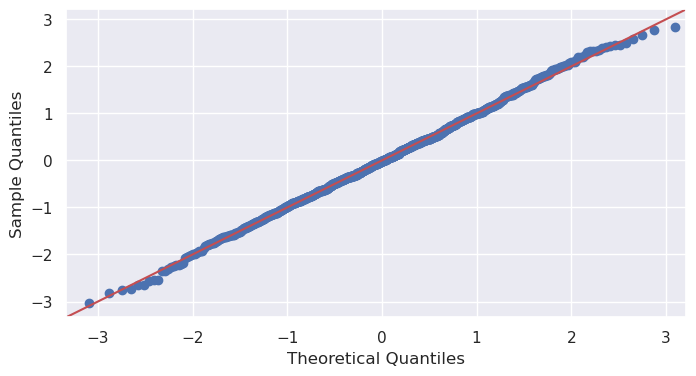

In [80]:
## QQ Plot d'une distribution normale
# https://www.statology.org/q-q-plot-python/
sm.qqplot(x, line='45', fit=True)
plt.show()

In [81]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
# https://www.statology.org/shapiro-wilk-test-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
stats.shapiro(x)
# Commentaire: la valeur de probabilité n'étant pas inférieure à 0.05 on ne peut par rejeteur l'H0 et donc la distribution est normale à 95% de probabilitéc

ShapiroResult(statistic=0.9985560774803162, pvalue=0.5916484594345093)

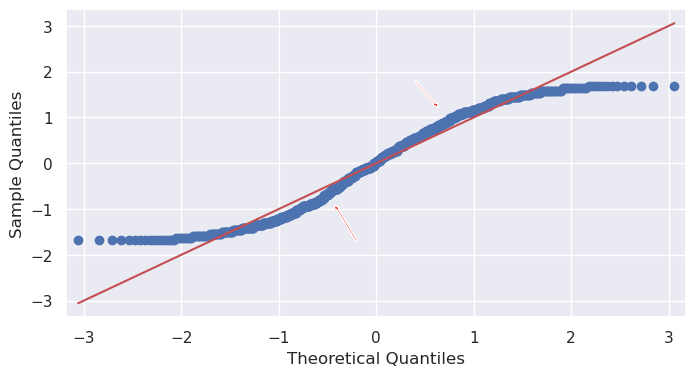

In [82]:
### QQ Plot des données concernant l'age de l'échantillon
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# fit = True normalise automatiquement les données
sm.qqplot(age, line='s', fit=True)
plt.arrow(x=-0.2, y=-1.7, dx=-0.2, dy=+0.7, width=.02, facecolor='red') 
plt.arrow(x=0.4, y=1.8, dx=0.2, dy=-0.5, width=.02, facecolor='red') 
plt.show()

In [83]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
sa = stats.shapiro(age)
# Commentaire: la valeur de probabilité est 0.000024199 et donc laragement inférieure à 0.05:
# on doit donc rejeteur l'H0 et considérer que la distribution ne suit pas la loi normale avec 95% de probabilité

In [84]:
from decimal import Decimal
print(f'Valeur p en décimales: {Decimal(sa.pvalue)} ({sa.statistic}, {sa.pvalue})')

Valeur p en décimales: 8.450067518002394467181714876602427466423250734806060791015625E-17 (0.9506165385246277, 8.450067518002394e-17)


Cette distribution a une apparence bimodale:
* Bimodal/multimodal probability distribution: https://en.wikipedia.org/wiki/Multimodal_distribution
* https://towardsdatascience.com/understand-q-q-plot-using-simple-python-4f83d5b89f8f

